In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


    aantal letter  std                                            stemmen
0      155      A    0  [1318.0, 1198.0, 712.0, 816.0, 629.0, 538.0, 3...
1      531      B    0  [1383.0, 1523.0, 594.0, 735.0, 883.0, 438.0, 3...
2      416      C    0  [1004.0, 1141.0, 724.0, 537.0, 836.0, 2710.0, ...
3     1283      D    0  [591.0, 11081.0, 2207.0, 2338.0, 1714.0, 1031....
4       86      E    0  [561.0, 1448.0, 433.0, 201.0, 599.0, 300.0, 96...
5       92      F    0  [274.0, 263.0, 786.0, 337.0, 249.0, 593.0, 239...
6      284      G    0  [770.0, 620.0, 220.0, 664.0, 456.0, 3432.0, 75...
7      270      H    0  [1652.0, 2363.0, 429.0, 285.0, 1184.0, 5538.0,...
8       18      I    0  [943.0, 820.0, 647.0, 720.0, 228.0, 215.0, 704...
9      118      J    0  [726.0, 668.0, 656.0, 447.0, 785.0, 366.0, 551...
10     146      K    0  [606.0, 2357.0, 4545.0, 2044.0, 5952.0, 401.0,...
11     326      L    0  [578.0, 658.0, 182.0, 817.0, 361.0, 1231.0, 59...
12     425      M    0  [742.0, 743.0,


Er is geen Normaalverdeling!
Er waren niet genoeg gegevens om dit te berekenen!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!


Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er waren niet genoeg gegevens om dit te berekenen!
Er is geen Normaalverdeling!


Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!
Er is geen Normaalverdeling!


C:\Users\Tijs De Belie\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\mstats_basic.py:2205: RuntimeWarning: overflow encountered in long_scalars
  (n*(n-2)*(n-3)))


Er is geen Normaalverdeling!
Er waren niet genoeg gegevens om dit te berekenen!
Er waren niet genoeg gegevens om dit te berekenen!
Er waren niet genoeg gegevens om dit te berekenen!
Er waren niet genoeg gegevens om dit te berekenen!


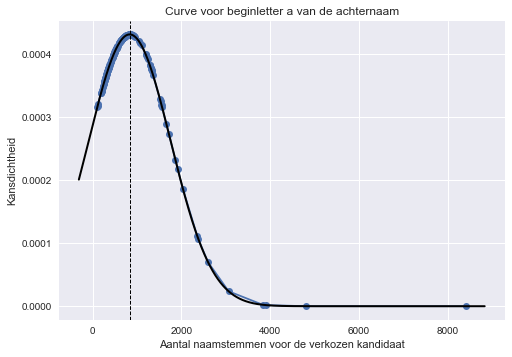

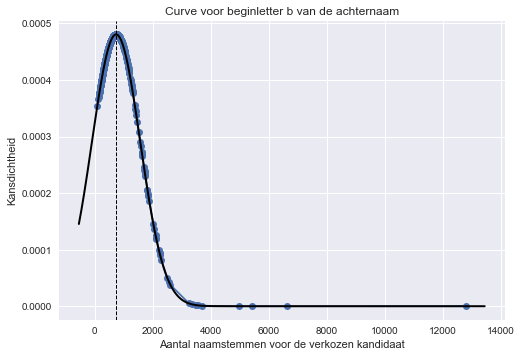

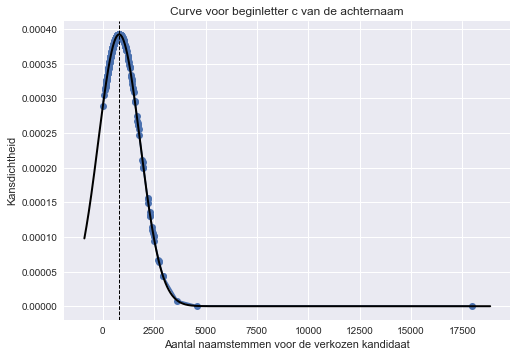

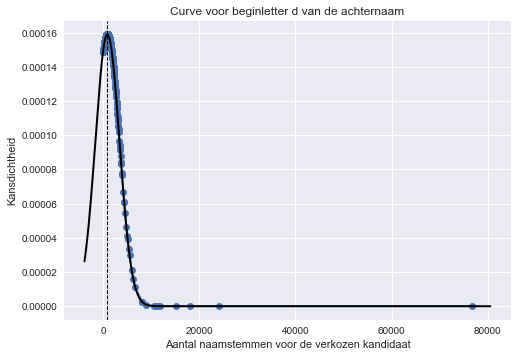

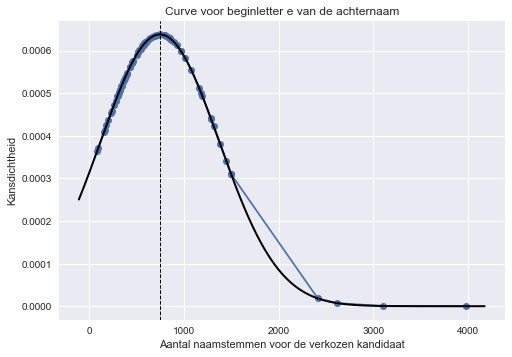

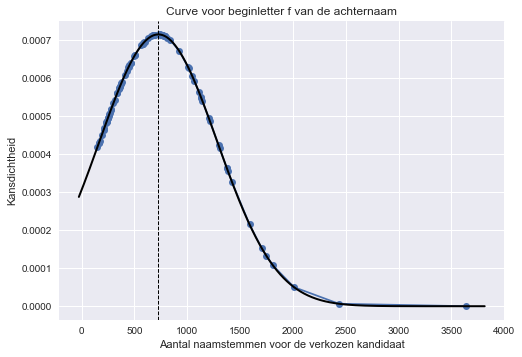

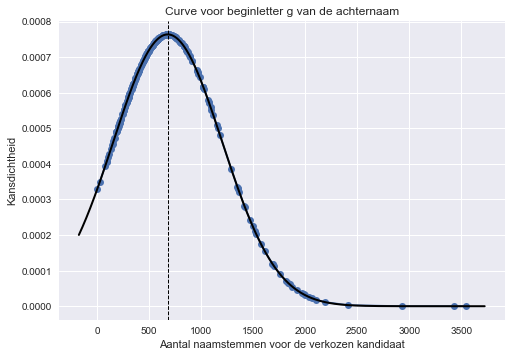

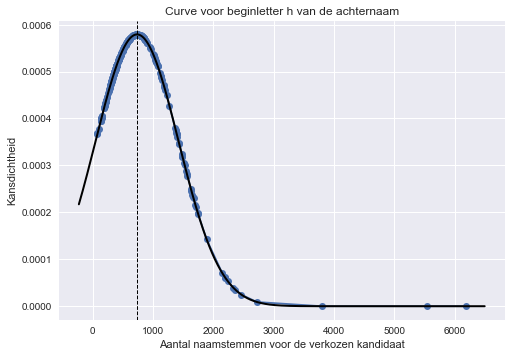

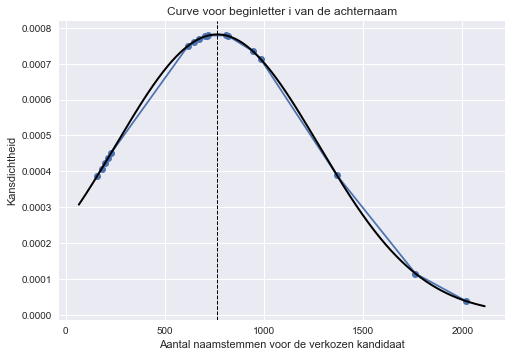

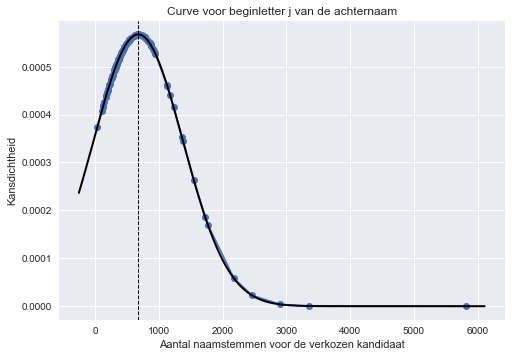

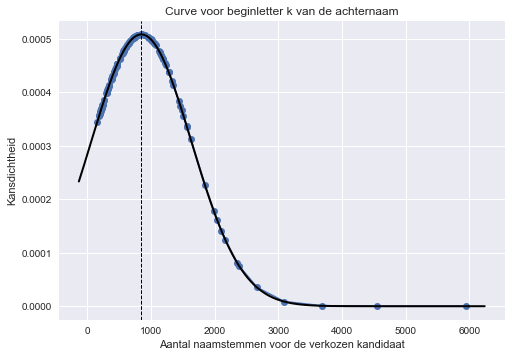

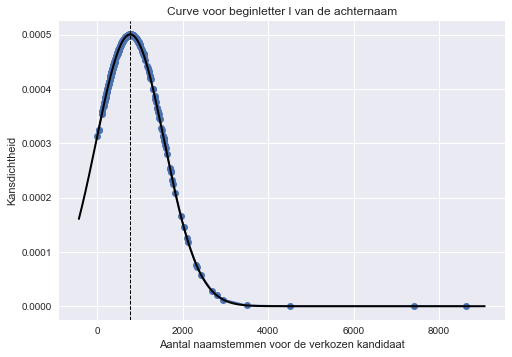

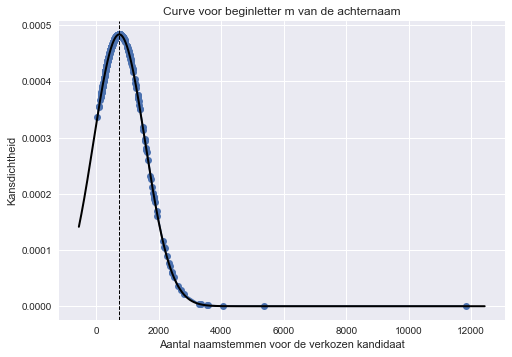

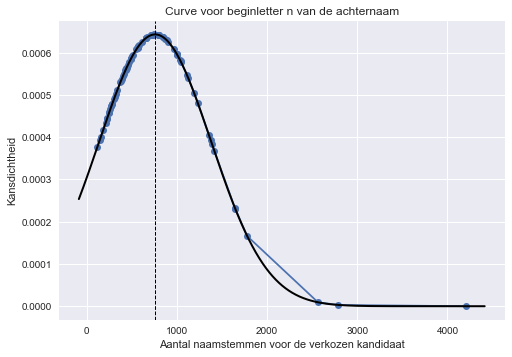

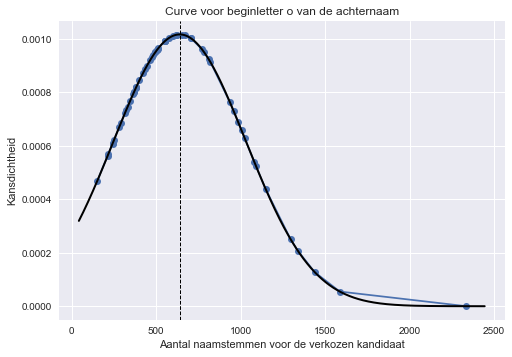

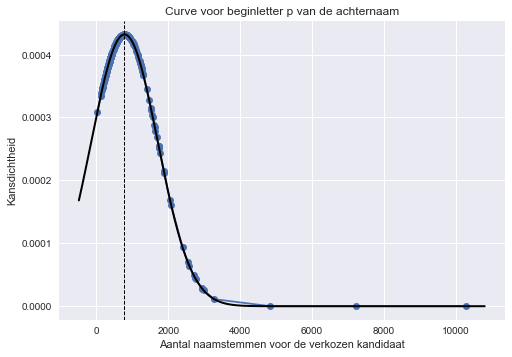

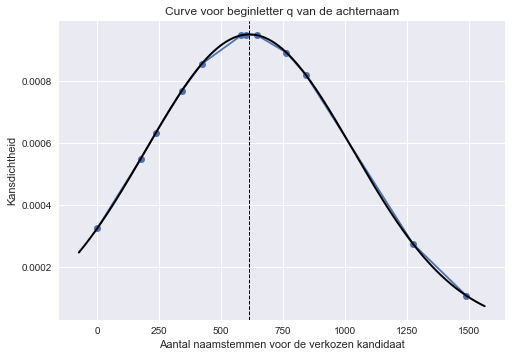

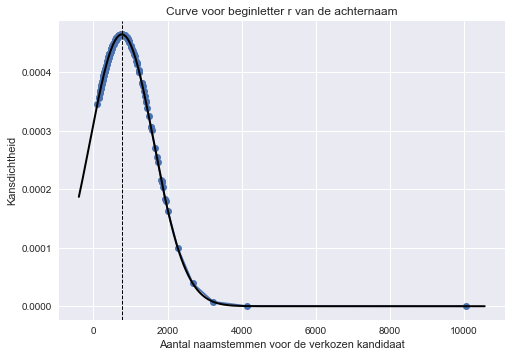

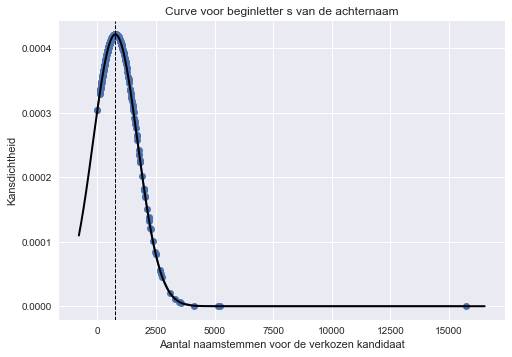

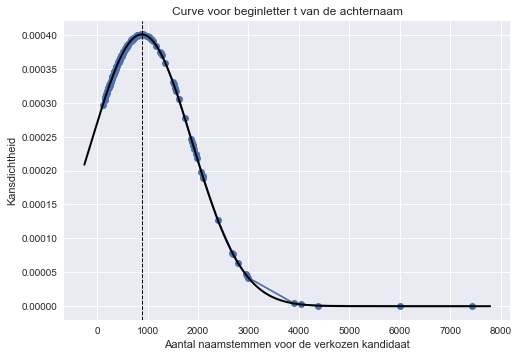

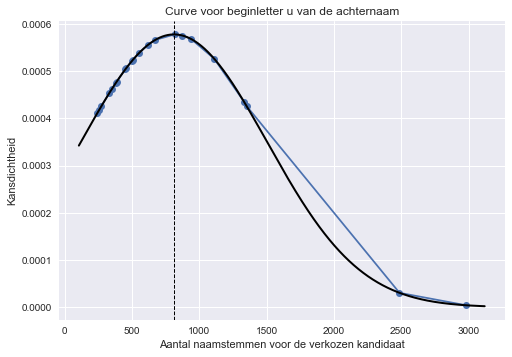

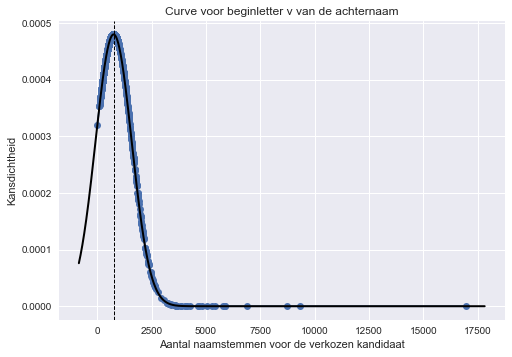

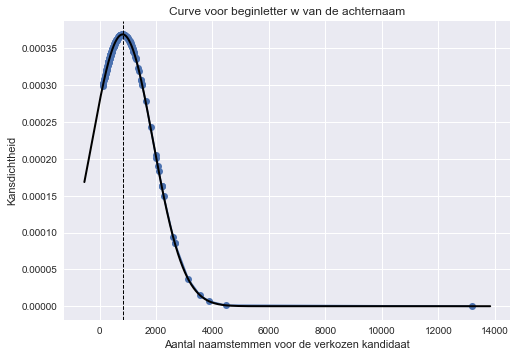

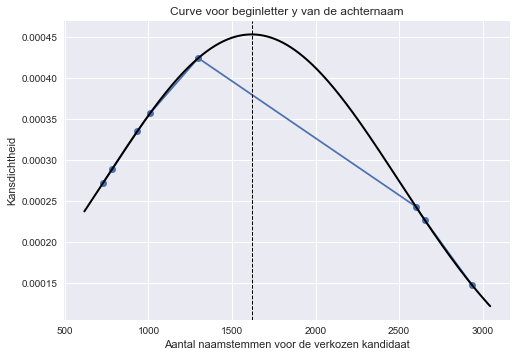

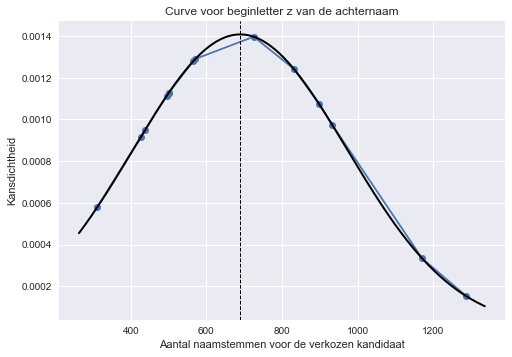

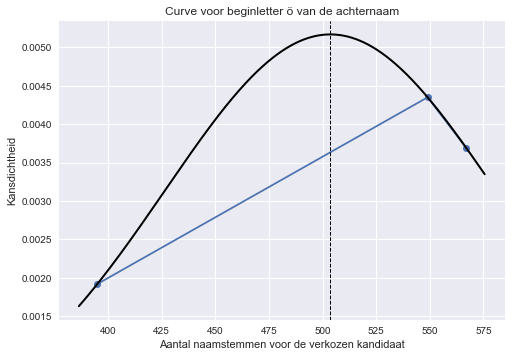

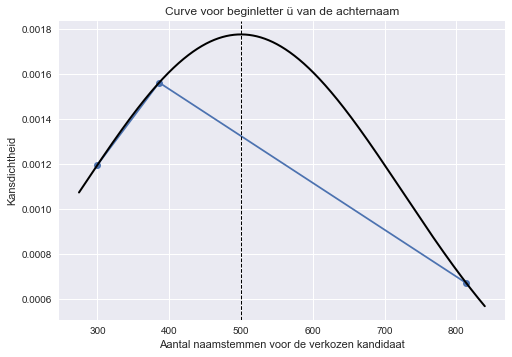

    aantal letter          std    stemmen
0      155      A   925.059476   129601.0
1      531      B   830.099225   393713.0
2      416      C  1016.452419   331206.0
3     1283      D  2510.057494  1192426.0
4       86      E   625.515228    64211.0
5       92      F   557.246325    66747.0
6      284      G   522.305658   192324.0
7      270      H   688.877130   197915.0
8       18      I   510.393727    13765.0
9      118      J   703.443286    79672.0
10     146      K   785.514154   124206.0
11     326      L   797.450071   251086.0
12     425      M   825.019702   310870.0
13      82      N   620.021463    62194.0
14      60      O   392.373503    38342.0
15     281      P   923.320574   219576.0
16      12      Q   418.909920     7371.0
17     203      R   859.170328   155829.0
18     489      S   947.226702   375236.0
19     170      T   995.892268   150054.0
20      22      U   690.848598    17860.0
21    1692      V   831.817395  1266944.0
22     209      W  1081.710820   1

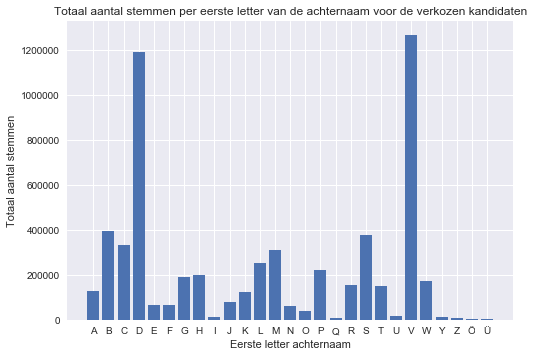

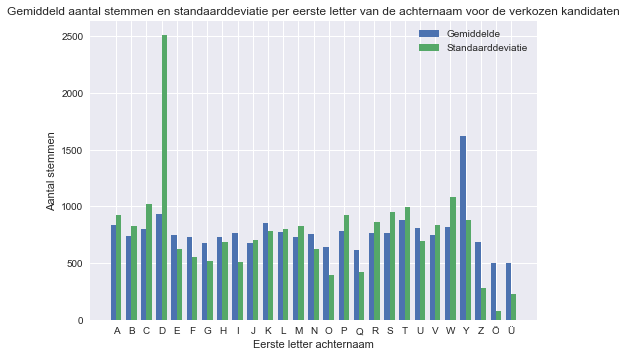

In [7]:
# %matplotlib inline




# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import mstats
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import pandas as pd

import re
import json
import math

plt.style.use('seaborn')
plt.rcParams.update({'figure.max_open_warning': 0})

kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=naam,naamstemmen,verkozen&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)
data = data["results"]

eindarray = list()

def search(letter):
       found = False
       for d in eindarray:
            if(letter in d.values()):
                return True
            else: 
                found = False
       return found

for x in data:
    if len(x["verkozen"]) >= 1:
        name = x["naam"][:1]
        if(search(name) == True):
            for y in eindarray:
                if(y["letter"] == name):
                    y["stemmen"].append(float(x["naamstemmen"]))
                    y["aantal"] +=1
                    
        else :
            thisdict = {
                "letter": name,
                "stemmen": [float(x["naamstemmen"])],
                "aantal" : 1,
                "std": 0
            }
            eindarray.append(thisdict)


eindarray = sorted(eindarray, key=lambda k: k['letter']) 

dataframe = pd.DataFrame(eindarray)
print(dataframe)


index = 0

for a in eindarray:
    
    plt.figure(index+1)
    mean = np.mean(a["stemmen"])
    

    
    a["std"] = np.std(a["stemmen"])
    a["stemmen"] = sorted(a["stemmen"])
    y = norm.pdf(a["stemmen"], np.mean(a["stemmen"]), a["std"])
    plt.plot(a["stemmen"],y, '-o', label='Data')
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Aantal naamstemmen voor de verkozen kandidaat")
    plt.ylabel("Kansdichtheid")

    plt.title("Curve voor beginletter " + a["letter"].lower() + " van de achternaam")
    
    mu, std = norm.fit(a["stemmen"])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 10000)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)

    if(len(a["stemmen"]) >= 20):
        z,pval = mstats.normaltest(a["stemmen"])

        if(pval < 0.04284731):
            print("Er is geen Normaalverdeling!")
        else:
            print("Er is een Normaalverdeling!")
    else:
        print("Er waren niet genoeg gegevens om dit te berekenen!")
    
    som = 0
    index +=1
    for x in a["stemmen"]:
        som += float(x)
    a["stemmen"] = som

plt.show()

dataframe = pd.DataFrame(eindarray)
print(dataframe)

x_as = list()
y_as = list()
aantal_as = list()
standaarddev = list()
for d in eindarray:
    x_as.append(str(d["letter"]))
    y_as.append(float(d["stemmen"]))
    aantal_as.append(d["aantal"])
    standaarddev.append(d["std"])


gemiddelde = list()

i = 0
for e in y_as:
    gemiddelde.append(e/aantal_as[i])
    i+=1




plt.xlabel("Eerste letter achternaam")
plt.ylabel("Totaal aantal stemmen")
plt.title("Totaal aantal stemmen per eerste letter van de achternaam voor de verkozen kandidaten")
plt.bar(x_as, y_as)
plt.show()


ax = plt.subplot(111)
N = len(x_as)
ind = np.arange(N) 

width = 0.35 

plt.bar(ind, gemiddelde, width, label='Gemiddelde')
plt.bar(ind + width, standaarddev, width,
    label='Standaarddeviatie')

plt.ylabel('Aantal stemmen')
plt.title('')
plt.xticks(ind + width / 2, x_as)
plt.xlabel("Eerste letter achternaam")
plt.title("Gemiddeld aantal stemmen en standaarddeviatie per eerste letter van de achternaam voor de verkozen kandidaten")
plt.legend(loc='best')
plt.show()

 


#Er is een verband tussen de eerste letter van de achternaam en het aantal stemmen voor de verkozen kandidaten
#Er is een verband tussen de eerste letter en het achternaam en het aantal stemmen dat nodig is om verkozen te geraken.


#Gemiddeld gezien hebben mensen met achternaam dat start met Y meer stemmen nodig om verkozen te worden. 